<a href="https://colab.research.google.com/github/HEMANTH-9501/Prediction-of-Migration-of-Birds/blob/main/DAV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("DAV PROJECT: Prediciton of migration of birds and animals")

DAV PROJECT: Prediciton of migration of birds and animals


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
import pandas as pd

# Assuming your CSV file is named 'your_file.csv'
csv_file_path = '/content/PFW_all_2021_2024_May2024_Public.csv'
df = pd.read_csv(csv_file_path)

# Now you can work with the DataFrame 'df'
print(df.head())

    LOC_ID   LATITUDE  LONGITUDE SUBNATIONAL1_CODE  ENTRY_TECHNIQUE  \
0  L100032  45.132361 -93.130328             US-MN  PointMaker1.0_2   
1  L100032  45.132361 -93.130328             US-MN  PointMaker1.0_2   
2  L100032  45.132361 -93.130328             US-MN  PointMaker1.0_2   
3  L100032  45.132361 -93.130328             US-MN  PointMaker1.0_2   
4  L100032  45.132361 -93.130328             US-MN  PointMaker1.0_2   

       SUB_ID         OBS_ID  Month  Day  Year  ... PLUS_CODE VALID REVIEWED  \
0  S100892478  OBS1320317836      1   15  2022  ...       NaN   1.0      0.0   
1  S100892478  OBS1320317837      1   15  2022  ...       NaN   1.0      0.0   
2  S100892478  OBS1320317838      1   15  2022  ...       NaN   1.0      0.0   
3  S100892478  OBS1320317839      1   15  2022  ...       NaN   1.0      0.0   
4  S100892478  OBS1320317840      1   15  2022  ...       NaN   1.0      0.0   

   DAY1_AM  DAY1_PM  DAY2_AM  DAY2_PM  EFFORT_HRS_ATLEAST  SNOW_DEP_ATLEAST  \
0        1   

In [ ]:
print(df.columns.tolist())

['LOC_ID', 'LATITUDE', 'LONGITUDE', 'SUBNATIONAL1_CODE', 'ENTRY_TECHNIQUE', 'SUB_ID', 'OBS_ID', 'Month', 'Day', 'Year', 'PROJ_PERIOD_ID', 'SPECIES_CODE', 'alt_full_spp_code', 'HOW_MANY', 'PLUS_CODE', 'VALID', 'REVIEWED', 'DAY1_AM', 'DAY1_PM', 'DAY2_AM', 'DAY2_PM', 'EFFORT_HRS_ATLEAST', 'SNOW_DEP_ATLEAST', 'Data_Entry_Method']


In [ ]:
df.info()  # Summary of dataset
df.isnull().sum()  # Check for missing values

# Handle missing values (example: fill with mean)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6809 entries, 0 to 6808
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LOC_ID              6809 non-null   object 
 1   LATITUDE            6809 non-null   float64
 2   LONGITUDE           6809 non-null   float64
 3   SUBNATIONAL1_CODE   6809 non-null   object 
 4   ENTRY_TECHNIQUE     6809 non-null   object 
 5   SUB_ID              6809 non-null   object 
 6   OBS_ID              6805 non-null   object 
 7   Month               6809 non-null   int64  
 8   Day                 6809 non-null   int64  
 9   Year                6809 non-null   int64  
 10  PROJ_PERIOD_ID      6809 non-null   object 
 11  SPECIES_CODE        6809 non-null   object 
 12  alt_full_spp_code   116 non-null    object 
 13  HOW_MANY            6805 non-null   float64
 14  PLUS_CODE           0 non-null      float64
 15  VALID               6805 non-null   float64
 16  REVIEW

,0
LOC_ID,0
LATITUDE,0
LONGITUDE,0
SUBNATIONAL1_CODE,0
ENTRY_TECHNIQUE,0
SUB_ID,0
OBS_ID,4
Month,0
Day,0
Year,0


In [ ]:
print(df['SPECIES_CODE'].nunique())  # Count unique species
print(df['SPECIES_CODE'].unique()[:10])  # Show first 10 unique species


87
['brdowl' 'dowwoo' 'moudov' 'blujay' 'daejun' 'norcar' 'whbnut' 'bkcchi'
 'rebnut' 'amegfi']


In [ ]:
print(df['SPECIES_CODE'].unique())  # Show all unique species codes


['brdowl' 'dowwoo' 'moudov' 'blujay' 'daejun' 'norcar' 'whbnut' 'bkcchi'
 'rebnut' 'amegfi' 'pisjun' 'haiwoo' 'houspa' 'amecro' 'rebwoo' 'amerob'
 'comred' 'orejun' 'rewbla' 'wooduc' 'coohaw' 'wiltur' 'foxspa' 'pilwoo'
 'mallar3' 'amtspa' 'eursta' 'houfin' 'shshaw' 'comgra' 'chispa' 'herthr'
 'bnhcow' 'yerwar' 'yebsap' 'whtspa' 'pinsis' 'rethaw' 'easpho' 'sonspa'
 'carwre' 'rocpig1' 'norfli' 'tuftit' 'easblu' 'purfin' 'rthhum' 'x00004'
 'slcjun' 'reshaw' 'gryjay' 'stejay' 'chbchi' 'annhum' 'spotow' 'gocspa'
 'commer' 'hoomer' 'varthr' 'mouchi' 'cangoo' 'rufhum' 'batpig1' 'comrav'
 'pacwre1' 'bkhgro' 'carchi' 'eastow' 'yetwar' 'ruckin' 'winwre3' 'merlin'
 'whcspa' 'rehwoo' 'evegro' 'rusbla' 'nobird' 'normoc' 'pingro' 'bkbmag1'
 'bohwax' 'norshr4' 'sancra' 'turvul' 'snogoo' 'horlar' 'y00033']


In [ ]:
print(df[df['SPECIES_CODE'] == "SPECIES_XYZ"].shape[0])


0


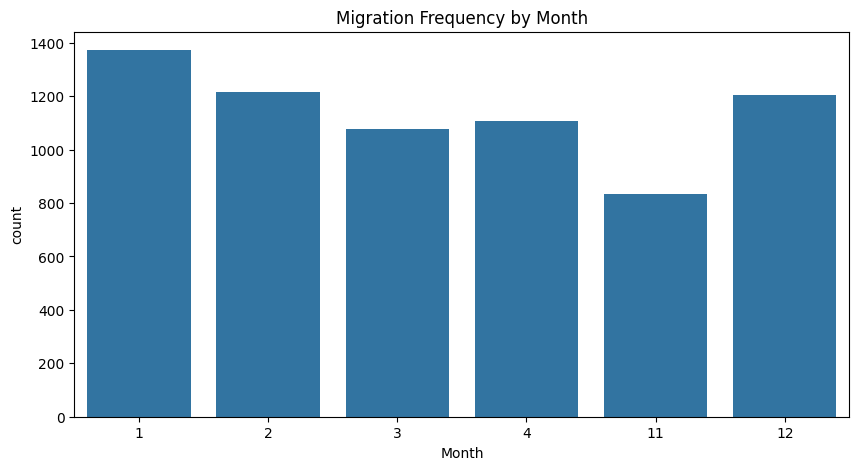

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Month', data=df, order=sorted(df['Month'].unique()))
plt.title('Migration Frequency by Month')
plt.show()

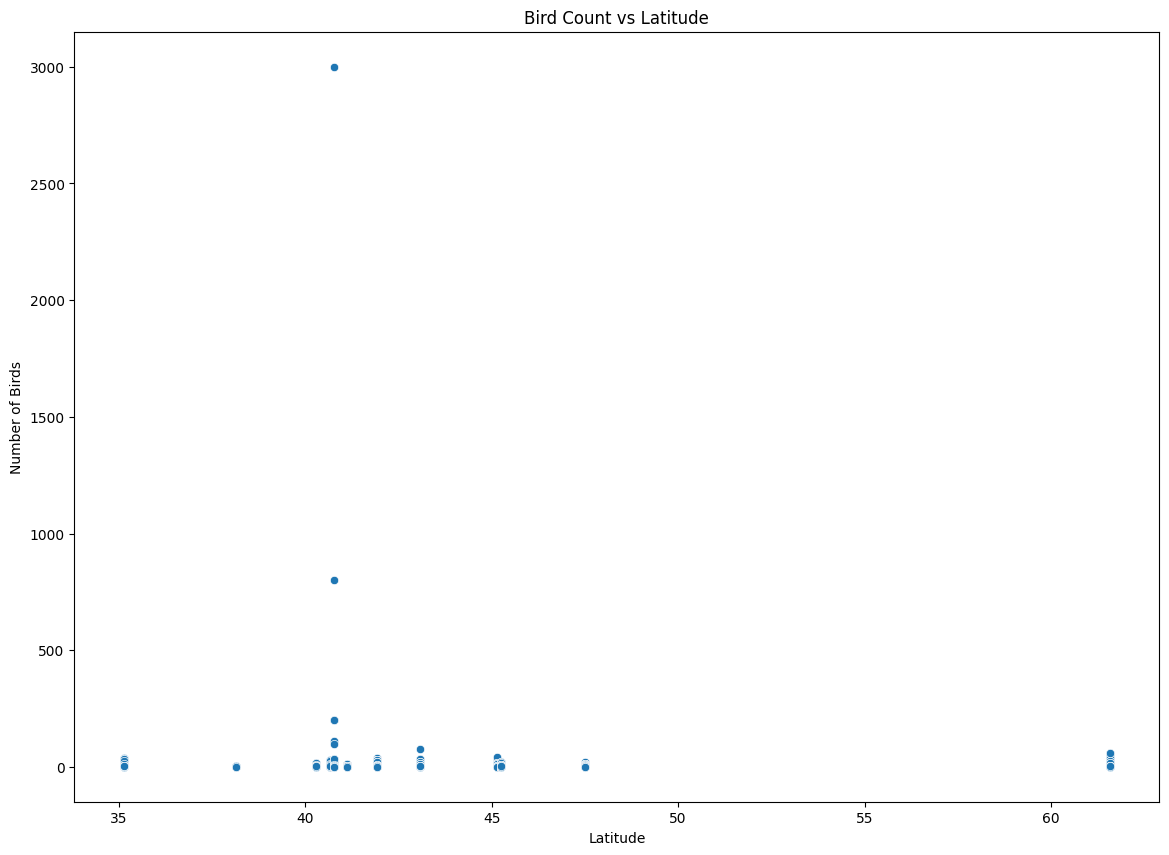

In [ ]:
plt.figure(figsize=(14,10))
sns.scatterplot(x=df['LATITUDE'], y=df['HOW_MANY'])
plt.title('Bird Count vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Number of Birds')
plt.show()

#Identify Seasonal Migration Trends

<ipython-input-12-2fe6a0af1536>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='HOW_MANY', data=df, estimator='sum', ci=None)


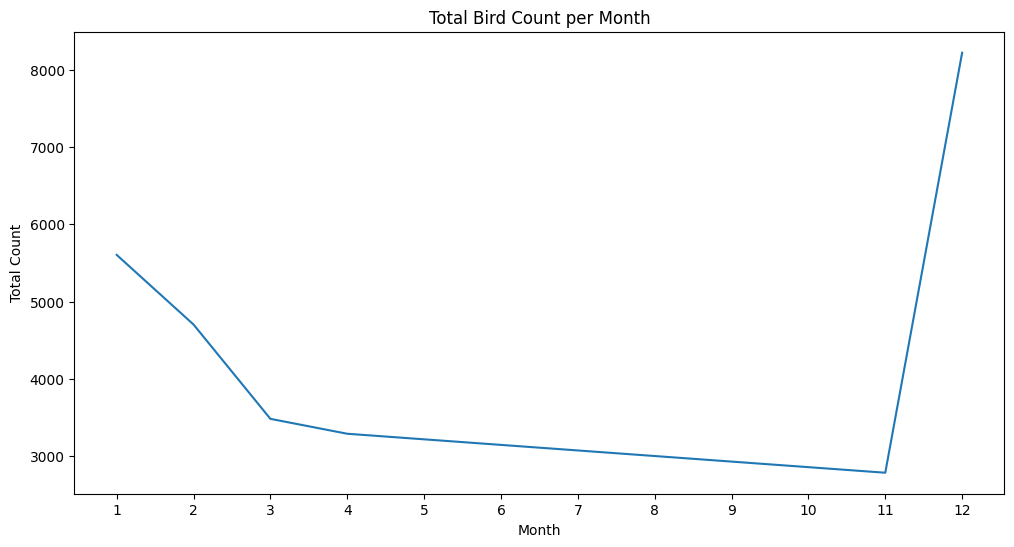

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='HOW_MANY', data=df, estimator='sum', ci=None)
plt.title('Total Bird Count per Month')
plt.xlabel('Month')
plt.ylabel('Total Count')
plt.xticks(range(1, 13))  # Ensure months are displayed properly
plt.show()


#Analyze Geographic Movement

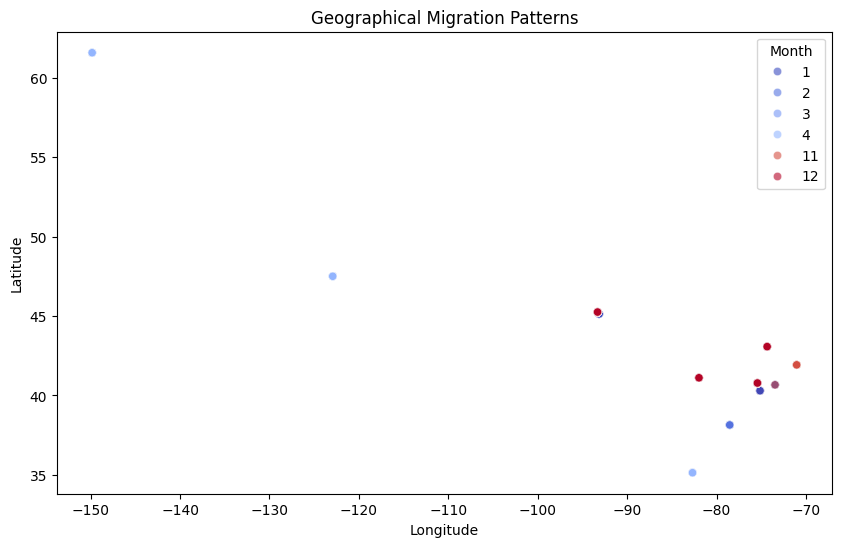

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['LONGITUDE'], y=df['LATITUDE'], hue=df['Month'], palette='coolwarm', alpha=0.6)
plt.title('Geographical Migration Patterns')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


#Species-Specific Migration Analysis

In [ ]:
top_species = df['SPECIES_CODE'].value_counts().head(5).index
print("Top 5 observed species:", top_species.tolist())


Top 5 observed species: ['bkcchi', 'dowwoo', 'norcar', 'daejun', 'blujay']


Most common species: bkcchi


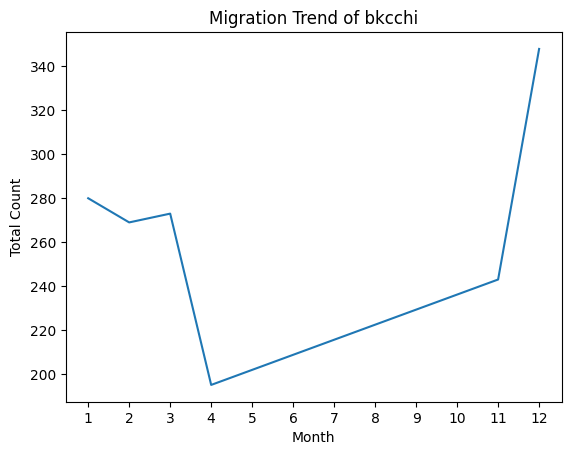

In [ ]:
top_species = df['SPECIES_CODE'].value_counts().index[0]  # Most frequent species
print(f"Most common species: {top_species}")

species_data = df[df['SPECIES_CODE'] == top_species]
sns.lineplot(x='Month', y='HOW_MANY', data=species_data, estimator='sum', errorbar=None)
plt.title(f'Migration Trend of {top_species}')
plt.xlabel('Month')
plt.ylabel('Total Count')
plt.xticks(range(1, 13))
plt.show()


#Steps for ML Modeling
1️⃣ Prepare the Data (Feature selection, missing value handling, encoding)

2️⃣ Split Data (Train-test split)

3️⃣ Train ML Models (Random Forest, Logistic Regression, or another suitable model)

4️⃣ Evaluate Performance

5️⃣ Make Predictions

importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


1️⃣ Prepare the Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Features (X) and target (y)
features = ['Month', 'LATITUDE', 'LONGITUDE', 'HOW_MANY']
target = 'SPECIES_CODE'  # Predicting species migration

# Encode target variable (if categorical)
le = LabelEncoder()
df[target] = le.fit_transform(df[target])

# Remove rows with missing values
df = df[features + [target]].dropna()

X = df[features]
y = df[target]


2️⃣ Split Data into Train and Test Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


3️⃣ Train a Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


4️⃣ Evaluate Performance

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.18
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.21      0.10      0.13        71
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           6       0.36      0.36      0.36        14
           7       0.32      0.43      0.37       114
           8       0.00      0.00      0.00         1
           9       0.12      0.14      0.13        65
          10       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         3
          14       0.15      0.46      0.23        13
          15       0.00      0.00      0.00        40
          16       0.00      0.00      0.00         6
          17       0.00      0.00      0.00         4
          18       0.33      0.08    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

5️⃣ Predict Migration for a New Data Point

In [ ]:
new_data = [[3, 45.0, -90.0, 10]]  # Replace with actual values
prediction = model.predict(new_data)
predicted_species = le.inverse_transform(prediction)
print("Predicted migrating species:", predicted_species[0])


Predicted migrating species: norcar


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.1763409257898604
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.21      0.10      0.13        71
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           6       0.36      0.36      0.36        14
           7       0.32      0.43      0.37       114
           8       0.00      0.00      0.00         1
           9       0.12      0.14      0.13        65
          10       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         3
          14       0.15      0.46      0.23        13
          15       0.00      0.00      0.00        40
          16       0.00      0.00      0.00         6
          17       0.00      0.00      0.00         4
          18       0.33     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

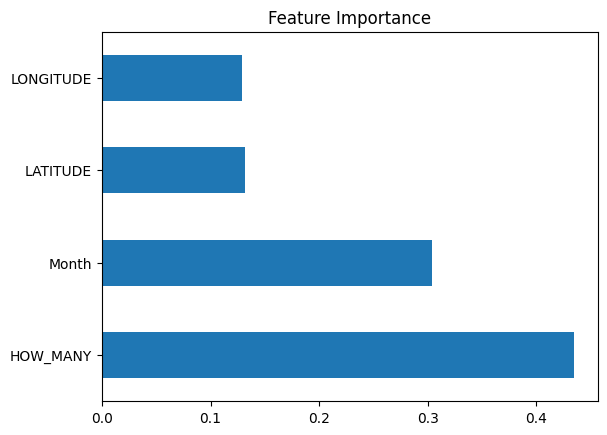

In [ ]:
# Plot feature importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importance")
plt.show()


#K-Means(clustering)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Load dataset
file_path = "/content/PFW_all_2021_2024_May2024_Public.csv"  # Change this path
df = pd.read_csv(file_path)

# Drop unnecessary columns
df = df.drop(['LOC_ID', 'SUB_ID', 'OBS_ID', 'PROJ_PERIOD_ID', 'alt_full_spp_code', 'PLUS_CODE'], axis=1, errors='ignore')

# Handle missing values
df = df.fillna(df.median(numeric_only=True))

# Convert categorical variables into numeric
cat_cols = ['SUBNATIONAL1_CODE', 'ENTRY_TECHNIQUE', 'SPECIES_CODE', 'VALID', 'REVIEWED', 'Data_Entry_Method']
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Normalize numerical features
scaler = StandardScaler()
num_cols = ['LATITUDE', 'LONGITUDE', 'EFFORT_HRS_ATLEAST', 'SNOW_DEP_ATLEAST']
df[num_cols] = scaler.fit_transform(df[num_cols])

# Convert date fields into single feature (day of the year)
df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df['day_of_year'] = df['date'].dt.dayofyear
df = df.drop(columns=['Year', 'Month', 'Day', 'date'])


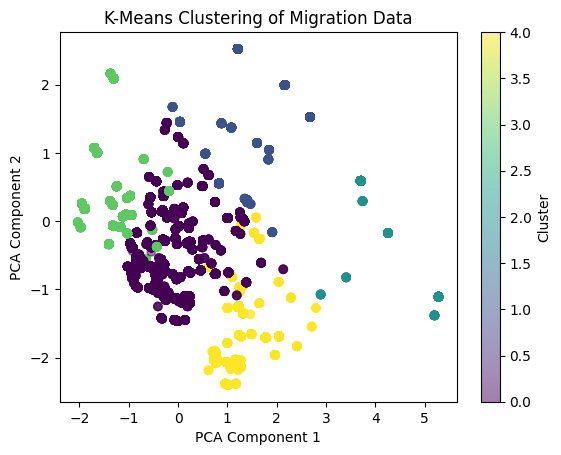

In [ ]:
# Choose number of clusters (based on Elbow Method)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df[num_cols])

# Visualizing Clusters using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[num_cols])
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.title("K-Means Clustering of Migration Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()


logistic regression for migration prediction

In [ ]:
# Define target variable (Binary classification)
df['MIGRATION_LABEL'] = (df['EFFORT_HRS_ATLEAST'] > 1).astype(int)  # Example condition

X = df.drop(columns=['MIGRATION_LABEL', 'Cluster'])  # Remove cluster column for now
y = df['MIGRATION_LABEL']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5792
           1       1.00      1.00      1.00      1034

    accuracy                           1.00      6826
   macro avg       1.00      1.00      1.00      6826
weighted avg       1.00      1.00      1.00      6826



#LSTM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import gc  # For memory management

# Memory optimization function
def reduce_mem_usage(df):
    """ Iterate through dataframe columns and reduce memory usage """
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtype
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    print(f'Memory usage reduced from {start_mem:.2f} MB to {end_mem:.2f} MB')
    return df

# Load data in chunks and preprocess
def load_and_preprocess(file_path, sample_size=None):
    chunks = []
    for chunk in pd.read_csv(file_path, chunksize=100000):
        # Drop columns as in your original code
        chunk = chunk.drop(['LOC_ID', 'SUB_ID', 'OBS_ID', 'PROJ_PERIOD_ID',
                          'alt_full_spp_code', 'PLUS_CODE'], axis=1, errors='ignore')

        # Fill NA
        num_cols = chunk.select_dtypes(include=np.number).columns
        chunk[num_cols] = chunk[num_cols].fillna(chunk[num_cols].median())

        chunks.append(chunk)
        if sample_size and len(pd.concat(chunks, ignore_index=True)) > sample_size:
            break

    df = pd.concat(chunks, ignore_index=True)
    if sample_size:
        df = df.sample(min(sample_size, len(df)), random_state=42)

    return reduce_mem_usage(df)

# Load a sample of data (adjust size based on your memory)
df = load_and_preprocess("/content/PFW_all_2021_2024_May2024_Public.csv", sample_size=500000)

# Feature engineering (similar to your approach but optimized for LSTM)
def create_features(df):
    # Encode categorical features
    cat_cols = ['SUBNATIONAL1_CODE', 'ENTRY_TECHNIQUE', 'SPECIES_CODE',
               'VALID', 'REVIEWED', 'Data_Entry_Method']
    for col in cat_cols:
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

    # Normalize numerical features
    num_cols = ['LATITUDE', 'LONGITUDE', 'EFFORT_HRS_ATLEAST', 'SNOW_DEP_ATLEAST']
    df[num_cols] = StandardScaler().fit_transform(df[num_cols])

    # Create temporal features
    df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
    df['day_of_year'] = df['date'].dt.dayofyear
    df['day_of_week'] = df['date'].dt.dayofweek
    df['is_weekend'] = df['day_of_week'].isin([5,6]).astype(int)

    # Target variable (migration label)
    df['MIGRATION_LABEL'] = (df['EFFORT_HRS_ATLEAST'] > 1).astype(int)

    # Drop original date columns
    df = df.drop(columns=['Year', 'Month', 'Day', 'date'])

    return df

df = create_features(df)

# Prepare sequences for LSTM
def create_sequences(df, sequence_length=7, target_col='MIGRATION_LABEL'):
    """Convert dataframe into sequences for LSTM"""
    features = df.drop(columns=[target_col]).columns
    X, y = [], []

    # Group by location to create location-specific sequences
    if 'SUBNATIONAL1_CODE' in df.columns:
        for _, group in df.groupby('SUBNATIONAL1_CODE'):
            for i in range(len(group) - sequence_length):
                X.append(group[features].iloc[i:i+sequence_length].values)
                y.append(group[target_col].iloc[i+sequence_length])
    else:
        for i in range(len(df) - sequence_length):
            X.append(df[features].iloc[i:i+sequence_length].values)
            y.append(df[target_col].iloc[i+sequence_length])

    return np.array(X), np.array(y)

# Create sequences (adjust sequence_length based on your temporal patterns)
sequence_length = 7  # Using 1 week as temporal context
X, y = create_sequences(df, sequence_length)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Free up memory
del df
gc.collect()

# LSTM Model Architecture
def build_lstm_model(input_shape, num_classes=1):
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.3),
        LSTM(64),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='sigmoid')  # sigmoid for binary classification
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', 'AUC']
    )
    return model

# Build model
model = build_lstm_model((sequence_length, X_train.shape[2]))

# Early stopping callback
early_stop = EarlyStopping(monitor='val_auc', patience=5,
                          mode='max', restore_best_weights=True)

# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=256,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate model
y_pred = (model.predict(X_test) > 0.5).astype(int)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Memory usage reduced from 6.93 MB to 3.01 MB


/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/datetimes.py:2457: RuntimeWarning: invalid value encountered in cast
  data = data.astype(DT64NS_DTYPE).view("i8")
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - AUC: 0.0000e+00 - accuracy: 0.8853 - loss: nan - val_AUC: 0.0000e+00 - val_accuracy: 0.8862 - val_loss: nan
Epoch 2/30


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: AUC,accuracy,loss,val_AUC,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


149/149 ━━━━━━━━━━━━━━━━━━━━ 19s 73ms/step - AUC: 0.0000e+00 - accuracy: 0.8857 - loss: nan - val_AUC: 0.0000e+00 - val_accuracy: 0.8862 - val_loss: nan
Epoch 3/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - AUC: 0.0000e+00 - accuracy: 0.8853 - loss: nan - val_AUC: 0.0000e+00 - val_accuracy: 0.8862 - val_loss: nan
Epoch 4/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - AUC: 0.0000e+00 - accuracy: 0.8858 - loss: nan - val_AUC: 0.0000e+00 - val_accuracy: 0.8862 - val_loss: nan
Epoch 5/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - AUC: 0.0000e+00 - accuracy: 0.8856 - loss: nan - val_AUC: 0.0000e+00 - val_accuracy: 0.8862 - val_loss: nan
Epoch 6/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 21s 76ms/step - AUC: 0.0000e+00 - accuracy: 0.8870 - loss: nan - val_AUC: 0.0000e+00 - val_accuracy: 0.8862 - val_loss: nan
Epoch 7/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - AUC: 0.0000e+00 - accuracy: 0.8888 - loss: nan - val_AUC: 0.0000e+00 - val_accuracy: 0.8862 - val_loss: nan
Epoch 8/30
149/149 ━━━━━━━━

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train logistic regeression  model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
file_path = "/content/PFW_all_2021_2024_May2024_Public.csv"  # Change this path
df = pd.read_csv(file_path)

# Drop unnecessary columns
df = df.drop(['LOC_ID', 'SUB_ID', 'OBS_ID', 'PROJ_PERIOD_ID', 'alt_full_spp_code', 'PLUS_CODE'], axis=1, errors='ignore')

# Handle missing values
df = df.fillna(df.median(numeric_only=True))

# Encode categorical features
cat_cols = ['SUBNATIONAL1_CODE', 'ENTRY_TECHNIQUE', 'SPECIES_CODE', 'VALID', 'REVIEWED', 'Data_Entry_Method']
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Normalize numerical features
scaler = StandardScaler()
num_cols = ['LATITUDE', 'LONGITUDE', 'EFFORT_HRS_ATLEAST', 'SNOW_DEP_ATLEAST']
df[num_cols] = scaler.fit_transform(df[num_cols])

# Convert date fields into single feature (day of the year)
df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df['day_of_year'] = df['date'].dt.dayofyear
df = df.drop(columns=['Year', 'Month', 'Day', 'date'])

# Define target variable
df['MIGRATION_LABEL'] = (df['EFFORT_HRS_ATLEAST'] > 1).astype(int)  # Example condition

X = df.drop(columns=['MIGRATION_LABEL'])
y = df['MIGRATION_LABEL']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

# Evaluate model
y_pred = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     51015
           1       1.00      1.00      1.00     14145

    accuracy                           1.00     65160
   macro avg       1.00      1.00      1.00     65160
weighted avg       1.00      1.00      1.00     65160



In [ ]:
def predict_migration_for_species():
    print("Enter bird species code to predict migration:")

    # Take user input for species
    species_code = input("Species Code: ")

    # Encode species input
    if species_code in label_encoders['SPECIES_CODE'].classes_:
        species_encoded = label_encoders['SPECIES_CODE'].transform([species_code])[0]
    else:
        print("Species not found in dataset. Using default encoding.")
        species_encoded = 0  # Default encoding if species not found

    # Use median values for other attributes
    default_values = X_train.median()

    # Create input array with species and default values
    input_data = default_values.copy()
    input_data['SPECIES_CODE'] = species_encoded  # Replace species with user input

    # Reshape for prediction
    input_array = np.array(input_data).reshape(1, -1)

    # Predict migration
    prediction = log_reg.predict(input_array)[0]
    migration_status = "Migrating" if prediction == 1 else "Not Migrating"

    print(f"Predicted Migration Status for {species_code}: {migration_status}")

# Call function
predict_migration_for_species()


Enter bird species code to predict migration:
Species Code: amecro
Predicted Migration Status for amecro: Not Migrating


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#prediction

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Load dataset
file_path = "/content/PFW_all_2021_2024_May2024_Public.csv"  # Change this path
df = pd.read_csv(file_path)

# Drop unnecessary columns
df = df.drop(['LOC_ID', 'SUB_ID', 'OBS_ID', 'PROJ_PERIOD_ID', 'alt_full_spp_code', 'PLUS_CODE'], axis=1, errors='ignore')

# Handle missing values
df = df.fillna(df.median(numeric_only=True))

# Encode categorical features
cat_cols = ['SUBNATIONAL1_CODE', 'ENTRY_TECHNIQUE', 'SPECIES_CODE', 'VALID', 'REVIEWED', 'Data_Entry_Method']
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Normalize numerical features
scaler = StandardScaler()
num_cols = ['LATITUDE', 'LONGITUDE', 'EFFORT_HRS_ATLEAST', 'SNOW_DEP_ATLEAST']
df[num_cols] = scaler.fit_transform(df[num_cols])

# Convert date fields into single feature (day of the year)
df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df['day_of_year'] = df['date'].dt.dayofyear
df = df.drop(columns=['Year', 'Month', 'Day', 'date'])

# Shift location data to create a target for "future migration location"
df['NEXT_LATITUDE'] = df.groupby('SPECIES_CODE')['LATITUDE'].shift(-1)
df['NEXT_LONGITUDE'] = df.groupby('SPECIES_CODE')['LONGITUDE'].shift(-1)

# Remove rows where next location is missing
df = df.dropna(subset=['NEXT_LATITUDE', 'NEXT_LONGITUDE'])

# Define input and target variables
X = df.drop(columns=['NEXT_LATITUDE', 'NEXT_LONGITUDE'])
y = df[['NEXT_LATITUDE', 'NEXT_LONGITUDE']]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regression Model to predict migration locations
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

print("Model trained to predict future migration locations.")


<ipython-input-32-77f668ab1107>:9: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Model trained to predict future migration locations.


In [ ]:
def predict_migration_location():
    print("Enter bird species code to predict future migration location:")

    # Take user input for species
    species_code = input("Species Code: ")

    # Encode species input
    if species_code in label_encoders['SPECIES_CODE'].classes_:
        species_encoded = label_encoders['SPECIES_CODE'].transform([species_code])[0]
    else:
        print("Species not found in dataset. Using default encoding.")
        species_encoded = 0  # Default encoding if species not found

    # Use median values for other attributes
    default_values = X_train.median()
    default_values['SPECIES_CODE'] = species_encoded  # Replace species with user input

    # Reshape input for prediction
    input_data = np.array(default_values).reshape(1, -1)

    # Predict future location
    predicted_location = rf_regressor.predict(input_data)[0]
    next_lat, next_lon = predicted_location

    print(f"Predicted Next Migration Location for {species_code}:")
    print(f"Latitude: {next_lat:.4f}, Longitude: {next_lon:.4f}")

# Call function
predict_migration_location()


Enter bird species code to predict future migration location:


#plotting

heatmap

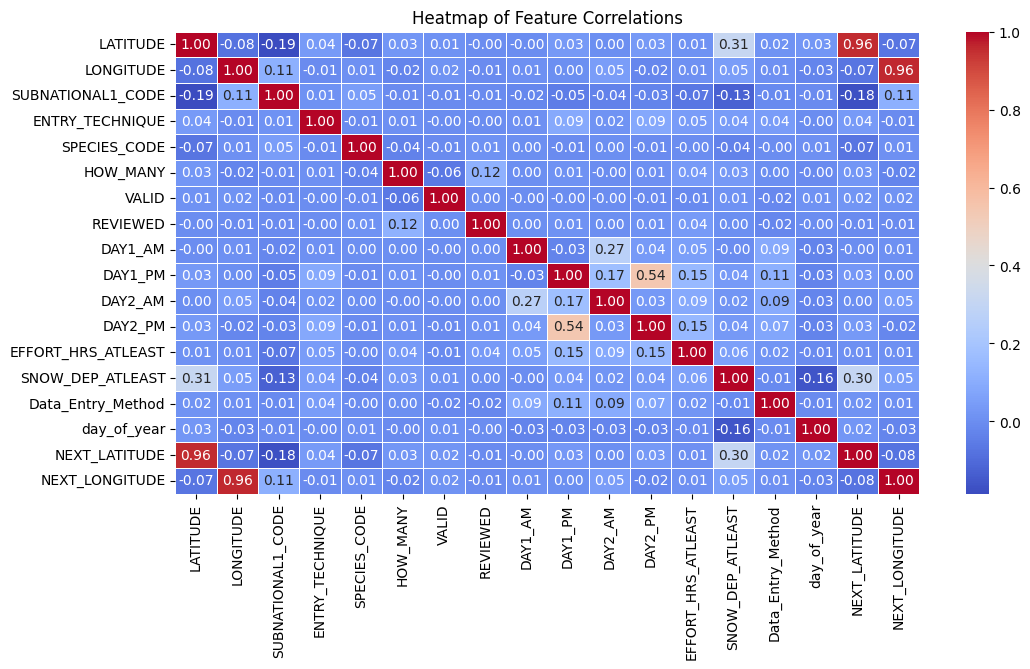

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Feature Correlations")
plt.show()


migration  routes of map


In [ ]:
import pandas as pd  # Import Pandas
import numpy as np  # Import NumPy
import seaborn as sns  # Import Seaborn for visualization
import matplotlib.pyplot as plt  # Import Matplotlib for plots
import folium  # Import Folium for maps


In [ ]:
df = pd.read_csv("PFW_all_2021_2024_May2024_Public.csv")
print(df.head())  # Check if data is loaded correctly


    LOC_ID   LATITUDE  LONGITUDE SUBNATIONAL1_CODE  ENTRY_TECHNIQUE  \
0  L100032  45.132361 -93.130328             US-MN  PointMaker1.0_2   
1  L100032  45.132361 -93.130328             US-MN  PointMaker1.0_2   
2  L100032  45.132361 -93.130328             US-MN  PointMaker1.0_2   
3  L100032  45.132361 -93.130328             US-MN  PointMaker1.0_2   
4  L100032  45.132361 -93.130328             US-MN  PointMaker1.0_2   

       SUB_ID         OBS_ID  Month   Day    Year  ... PLUS_CODE VALID  \
0  S100892478  OBS1320317836    1.0  15.0  2022.0  ...       NaN   1.0   
1  S100892478  OBS1320317837    1.0  15.0  2022.0  ...       NaN   1.0   
2  S100892478  OBS1320317838    1.0  15.0  2022.0  ...       NaN   1.0   
3  S100892478  OBS1320317839    1.0  15.0  2022.0  ...       NaN   1.0   
4  S100892478  OBS1320317840    1.0  15.0  2022.0  ...       NaN   1.0   

  REVIEWED  DAY1_AM  DAY1_PM  DAY2_AM  DAY2_PM  EFFORT_HRS_ATLEAST  \
0      0.0      1.0      0.0      1.0      1.0            

In [ ]:
# Limit the dataset for faster plotting (change 500 to a smaller number if needed)
df_sample = df.sample(n=100, random_state=42)  # Choose a random sample

# Create a map centered at the average location
center_lat, center_lon = df_sample['LATITUDE'].mean(), df_sample['LONGITUDE'].mean()
migration_map = folium.Map(location=[center_lat, center_lon], zoom_start=4)

# Add migration paths to the map
for _, row in df_sample.iterrows():
    folium.Marker([row['LATITUDE'], row['LONGITUDE']],
                  popup=f"Species: {row['SPECIES_CODE']}").add_to(migration_map)

# Show the map
migration_map


Scatter Plot: Clustering of Migration

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


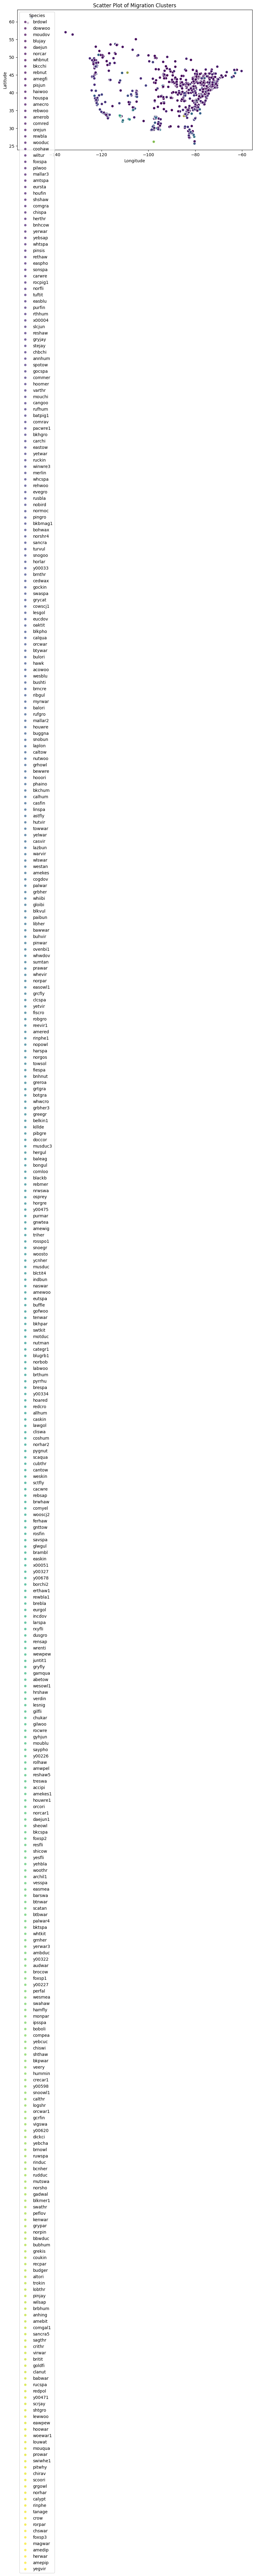

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['LONGITUDE'], y=df['LATITUDE'], hue=df['SPECIES_CODE'], palette="viridis", alpha=0.7)
plt.title("Scatter Plot of Migration Clusters")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Species")
plt.show()


Time Series Plot: Seasonal Migration Trends

In [ ]:
# Convert Year, Month, Day into a datetime object
df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']], errors='coerce')

# Check if conversion was successful
if df['date'].isna().sum() > 0:
    print("Warning: Some dates could not be converted!")

# Create the 'day_of_year' column
df['day_of_year'] = df['date'].dt.dayofyear

# Drop the temporary 'date' column
df = df.drop(columns=['date'])

# Print a sample of the dataset
print(df[['Year', 'Month', 'Day', 'day_of_year']].head())


     Year  Month   Day  day_of_year
0  2022.0    1.0  15.0         15.0
1  2022.0    1.0  15.0         15.0
2  2022.0    1.0  15.0         15.0
3  2022.0    1.0  15.0         15.0
4  2022.0    1.0  15.0         15.0


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


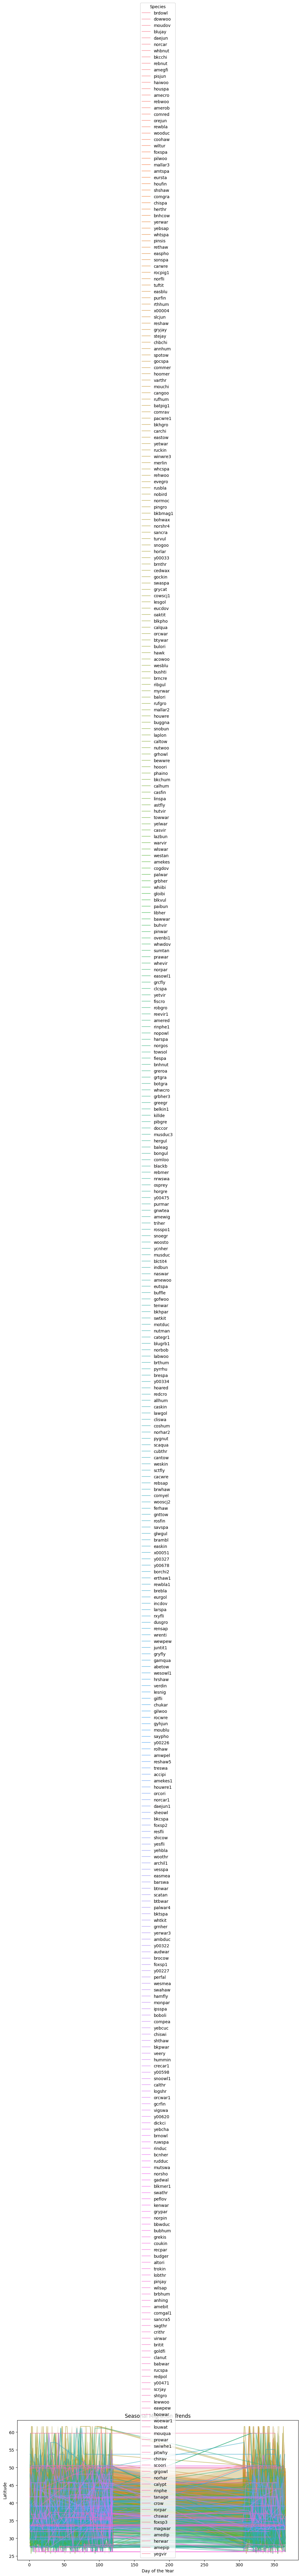

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['day_of_year'], y=df['LATITUDE'], hue=df['SPECIES_CODE'], alpha=0.6)
plt.title("Seasonal Migration Trends")
plt.xlabel("Day of the Year")
plt.ylabel("Latitude")
plt.legend(title="Species")
plt.show()
